# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib as mat
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [2]:
np.__version__

'1.21.5'

In [3]:
pd.__version__

'1.4.2'

In [4]:
mat.__version__

'3.5.1'

In [5]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração e Transformação de Dados

In [8]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
print(iris.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df2 = df.copy()
df2['name_sapiens'] = np.zeros(len(df2))
df2['name_sapiens'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [29]:
df2.name_sapiens.describe()

count        150
unique         3
top       setosa
freq          50
Name: name_sapiens, dtype: object

In [38]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df2['target'] = iris.target
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name_sapiens,name_sapiens_number,target
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [39]:
# Extraia as features (atributos) do dataset e imprima 
df2.columns[:4]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [45]:
# Calcule a média de cada feature para as 3 classes
df2.groupby('target').mean().T

target,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026
name_sapiens_number,0.000,1.000,2.000


## Exploração de Dados

In [46]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df2.transpose()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
name_sapiens,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
name_sapiens_number,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
target,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [47]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sepal length (cm)    150 non-null    float64 
 1   sepal width (cm)     150 non-null    float64 
 2   petal length (cm)    150 non-null    float64 
 3   petal width (cm)     150 non-null    float64 
 4   name_sapiens         150 non-null    category
 5   name_sapiens_number  150 non-null    int64   
 6   target               150 non-null    int64   
dtypes: category(1), float64(4), int64(2)
memory usage: 7.4 KB


In [48]:
# Faça um resumo estatístico do dataset
df2.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name_sapiens_number,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


In [53]:
# Verifique se existem valores nulos no dataset
df2.isnull().sum()

sepal length (cm)      0
sepal width (cm)       0
petal length (cm)      0
petal width (cm)       0
name_sapiens           0
name_sapiens_number    0
target                 0
dtype: int64

In [56]:
# Faça uma contagem de valores de sepal length
df2['sepal length (cm)'].value_counts(dropna=False)

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal length (cm), dtype: int64

## Plot

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

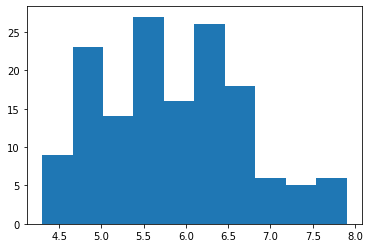

In [57]:
# Crie um Histograma de sepal length
plt.hist(df2['sepal length (cm)'])

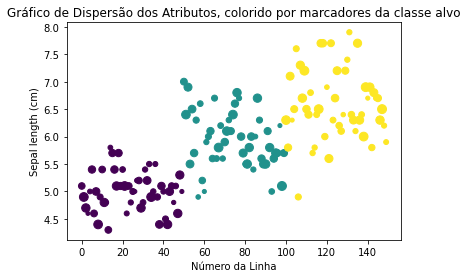

In [68]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length 
# versus número da linha, 

y = df2['sepal length (cm)']
x = range(len(df2))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=df2.target)

plt.xlabel('Número da Linha')
plt.ylabel('Sepal length (cm)')
plt.title('Gráfico de Dispersão dos Atributos, colorido por marcadores da classe alvo')

plt.show()
# colorido por marcadores da variável target


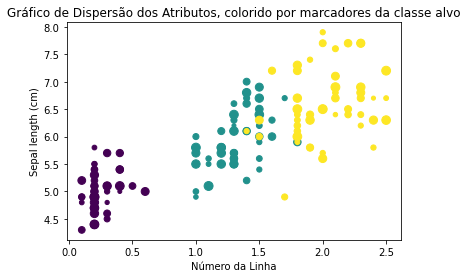

In [69]:
# Crie um Scatter Plot de 2 Features (atributos)
y = df2['sepal length (cm)']
x = df2['petal width (cm)']

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=df2.target)

plt.xlabel('Número da Linha')
plt.ylabel('Sepal length (cm)')
plt.title('Gráfico de Dispersão dos Atributos, colorido por marcadores da classe alvo')

plt.show()
# colorido por marcadores da variável target



array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

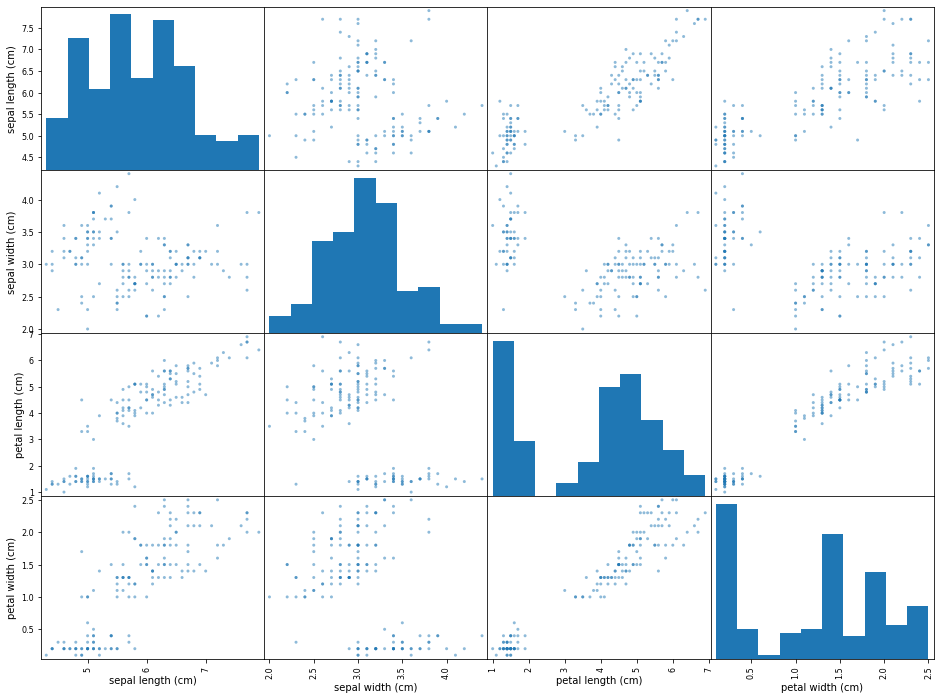

In [70]:
# Crie um Scatter Matrix das Features (atributos)
attributes = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
              'petal width (cm)']
pd.plotting.scatter_matrix(df[attributes], figsize=(16, 12))

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

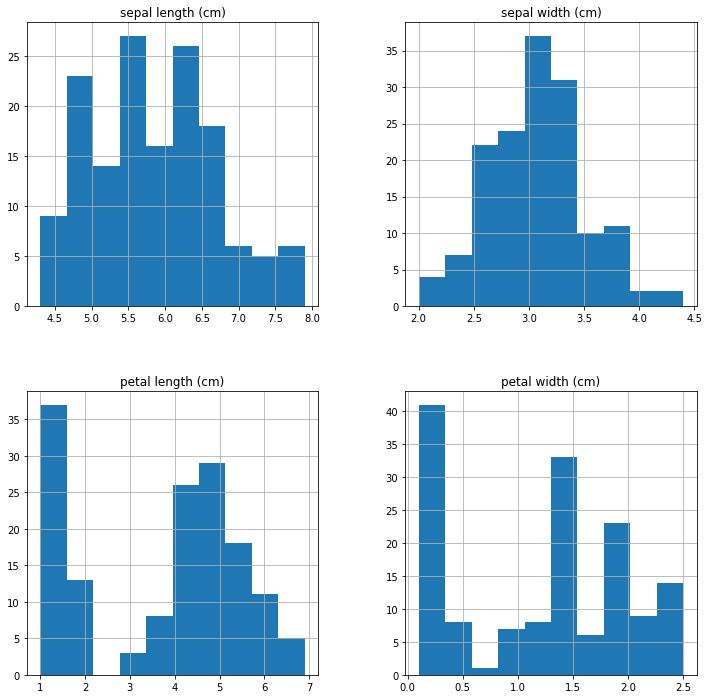

In [83]:
# Crie um Histograma de todas as features

# plot:
df2.iloc[:,:5].hist(figsize=(12,12))

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>